#### Batting Case

##### John Yin

In [1]:
# Loading Libs
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###### Download data from R

library(Lahman)

head(Batting)



In [4]:
# Loading Data
batting = pd.read_csv(file_path, sep='\t', header = 0,  encoding='latin-1')

batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,X3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
1,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
4,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
5,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
batting.describe()

,yearID,stint,G,AB,R,H,X2B,X3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [6]:
# Count Missing Data
batting.apply(lambda x: sum(x.isnull()),axis=0)

playerID        0
yearID          0
stint           0
teamID          0
lgID          737
G               0
AB              0
R               0
H               0
X2B             0
X3B             0
HR              0
RBI           424
SB           1300
CS          23456
BB              0
SO           7838
IBB         36565
HBP          2810
SH           6338
SF          36034
GIDP        26110
dtype: int64

In [7]:
# Filter out year before 2000, AB=0 and SB is null
bat= batting[(batting.yearID>=2000)& (batting.AB!=0)&(batting.SB is not None)]

In [8]:
# Group by teamID and yearID, get sum of SB and AB
batsum = bat.groupby(["teamID", "yearID"]).agg({'SB':'sum', 'AB':'sum'}).reset_index()

In [9]:
# Calculate Stolen Base Per at Bat
stolenBasePerBat = 100 *batsum['SB']/batsum['AB']

In [10]:
batsum['stolenBasePerBat'] = stolenBasePerBat

In [11]:
batsum.describe()

,yearID,SB,AB,stolenBasePerBat
count,510.000000,510.000000,510.000000,510.000000
mean,2008.000000,93.954902,5541.686275,1.696055
std,4.903789,30.438510,78.394622,0.550998
min,2000.000000,19.000000,5294.000000,0.343954
25%,2004.000000,71.000000,5487.000000,1.280531
50%,2008.000000,91.000000,5542.000000,1.631392
75%,2012.000000,114.750000,5596.000000,2.067084
max,2016.000000,200.000000,5769.000000,3.568243


In [12]:
bat_sorted = batsum.sort_values('stolenBasePerBat',ascending=False)
bat_sorted.head(5)

,teamID,yearID,SB,AB,stolenBasePerBat
318,NYN,2007,200.0,5605,3.568243
456,TBA,2009,194.0,5462,3.551813
271,MIL,2016,181.0,5330,3.395872
177,FLO,2002,177.0,5496,3.220524
457,TBA,2010,172.0,5439,3.162346


So the top 5 teams with largest stolen bases per bat ratio since 2000 are:
NYN, TBA, MIL, FLO and TBA

In [13]:
# Group by year, with sum of SB.per.AB
batyear = bat.groupby(["yearID"]).agg({'SB':'sum', 'AB':'sum'}).reset_index()

In [14]:
SBperAB = 100 *batyear['SB']/batyear['AB']
batyear['SBperAB'] = SBperAB

In [15]:
batyear.head()

,yearID,SB,AB,SBperAB
0,2000,2924.0,167290,1.747863
1,2001,3103.0,166234,1.866646
2,2002,2750.0,165582,1.660809
3,2003,2572.0,166737,1.542549
4,2004,2588.0,167353,1.546432


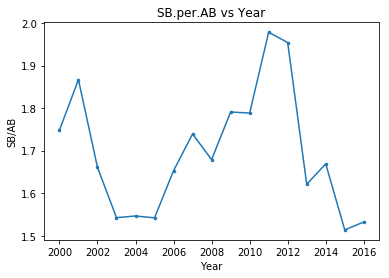

In [16]:
plt.plot(batyear['yearID'],batyear['SBperAB'], marker='.', markersize=5)
plt.title('SB.per.AB vs Year')
plt.xlabel('Year')
plt.ylabel('SB/AB')
plt.show()

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


###### Split X and Y

In [18]:
x = batyear.yearID
y = batyear.SBperAB

In [19]:
x.shape, y.shape

((17,), (17,))

###### Split train and test

In [20]:
x_train_set, x_test_set = train_test_split(x, test_size=0.2, random_state=42)
y_train_set, y_test_set = train_test_split(y, test_size=0.2, random_state=42)

x_train_set.shape, x_test_set.shape

((13,), (4,))

In [21]:
x_train = np.array(x_train_set).reshape(-1,1)
x_test = np.array(x_test_set).reshape(-1,1)

x_train.shape, x_test.shape

((13, 1), (4, 1))

###### Linear Regression Model (one Variable)

Coefficients: 
 [ 0.00808672]
Mean squared error: 0.03
Variance score: -0.63


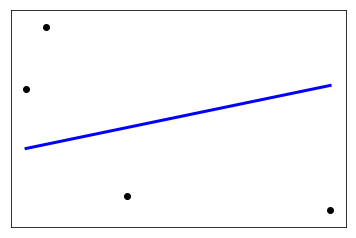

In [26]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train_set)

y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_set, y_pred))
print('Variance score: %.2f' % r2_score(y_test_set, y_pred))

plt.scatter(x_test, y_test_set,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Not Good for using linear regression model

Would try to use Time Series for next step

In [ ]:
if batting.playerID == 'donnepe01':
    for yr in yearID:
        print (PlayerID, yearID)

playyears =  batting[(batting.playerID == 'donnepe01')][['playerID', 'yearID']]

In [ ]:
def getplayer (playerID):
    col_name = ['playerID', 'yearID']
    playeryears = pd.DataFrame()

    for ID in batting.playerID:
        if ID == playerID
    #     print([batting.playerID, batting.yearID])
        playeryears.append([batting.playerID], [batting.yearID])
        
    

In [ ]:
#sort
# activeYears = []
st= playyears.agg({'yearID':'min'})
def activeYear (playerID):
    playeryear = playyears.loc[playyears['playerID']==playerID].sort_values('yearID',ascending=False)
    for yearID in playeryear:
        cout = 0
        year = iter(batting.yearID)
        for yr in year:
            while yr+1 == next(year):
                count=+1
                if yr+1 != next(year):
                    print (playerID, count)
